## Install Dependancies and Setup

In [1]:
!pip install tensorflow tensorflow opencv-python matplotlib

In [2]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
applaunchservices             0.3.0
appnope                       0.1.2
appscript                     1.1.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcr

In [3]:
import tensorflow as tf
import os

2023-05-29 15:24:46.195117: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
gpus = tf.config.experimental.list_physical_devices('CPU')

In [5]:
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [6]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## Remove dodgy images

In [7]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [8]:
if os.path.isfile("Shot_Data/.DS_Store"):
    os.remove("Shot_Data/.DS_Store")

In [9]:
data_dir = 'Shot_Data'

In [10]:
image_exts = ['jpeg','jpg','bmp','png']

In [11]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

## Load Data

In [12]:
import numpy as np
from matplotlib import pyplot as plt  

In [13]:
Shot_Data = tf.keras.utils.image_dataset_from_directory('Shot_Data')

Found 86 files belonging to 2 classes.


2023-05-29 15:25:03.101394: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
data_iterator = Shot_Data.as_numpy_iterator()

In [15]:
batch = data_iterator.next()

In [16]:
batch[0].shape

(32, 256, 256, 3)

In [17]:
batch[1]

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0], dtype=int32)

In [18]:
batch

(array([[[[163.       , 130.       ,  99.       ],
          [180.33203  , 144.33203  , 120.33203  ],
          [181.16992  , 141.16992  , 106.16992  ],
          ...,
          [140.16602  , 111.33203  ,  71.33203  ],
          [134.49805  , 107.49805  ,  62.166016 ],
          [130.66406  , 114.49805  ,  55.996094 ]],
 
         [[164.       , 129.       ,  97.       ],
          [187.0039   , 150.0039   , 123.50586  ],
          [177.49805  , 139.       , 104.49414  ],
          ...,
          [150.49805  , 123.49805  ,  78.49805  ],
          [141.00781  , 113.00781  ,  63.007812 ],
          [135.9961   , 115.       ,  64.99609  ]],
 
         [[163.5293   , 123.69922  ,  89.03906  ],
          [181.98047  , 142.98047  , 112.32031  ],
          [175.33984  , 136.33984  , 103.33984  ],
          ...,
          [140.35938  , 113.359375 ,  68.01953  ],
          [134.16992  , 103.33984  ,  55.83008  ],
          [153.15039  , 126.66016  ,  83.490234 ]],
 
         ...,
 
         [[2

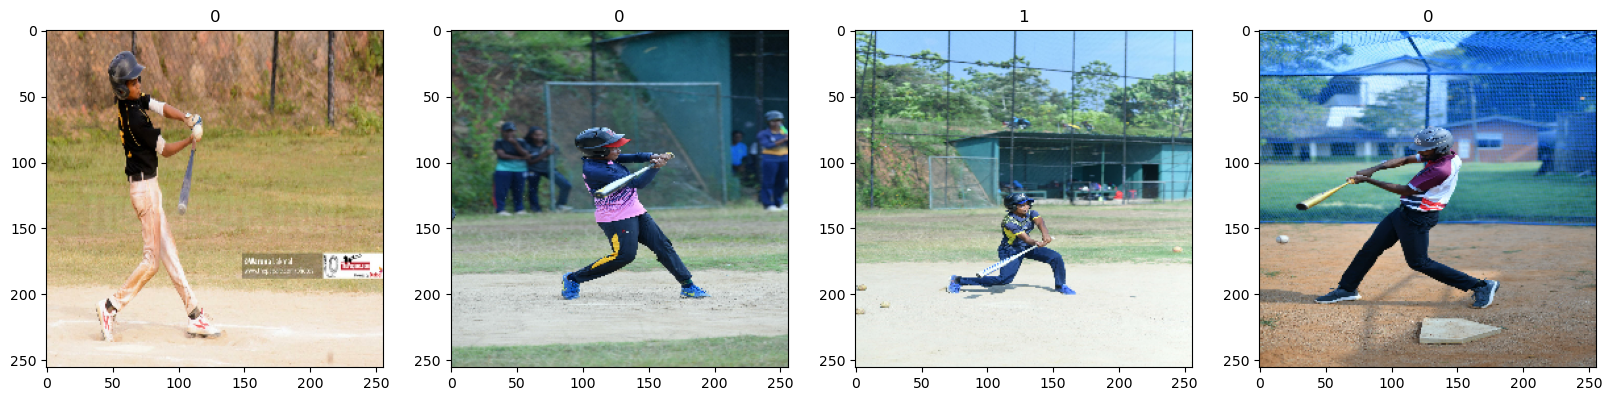

In [19]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    
# 0 = Correct / 1 = Incorrect

## Preprocess Data

In [21]:
scaled = batch[0] / 255

In [22]:
scaled.max()

1.0

In [23]:
Shot_Data = Shot_Data.map(lambda x,y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [24]:
scaled_iterator = Shot_Data.as_numpy_iterator()

In [25]:
batch = scaled_iterator.next()

In [26]:
batch[0].max()

1.0

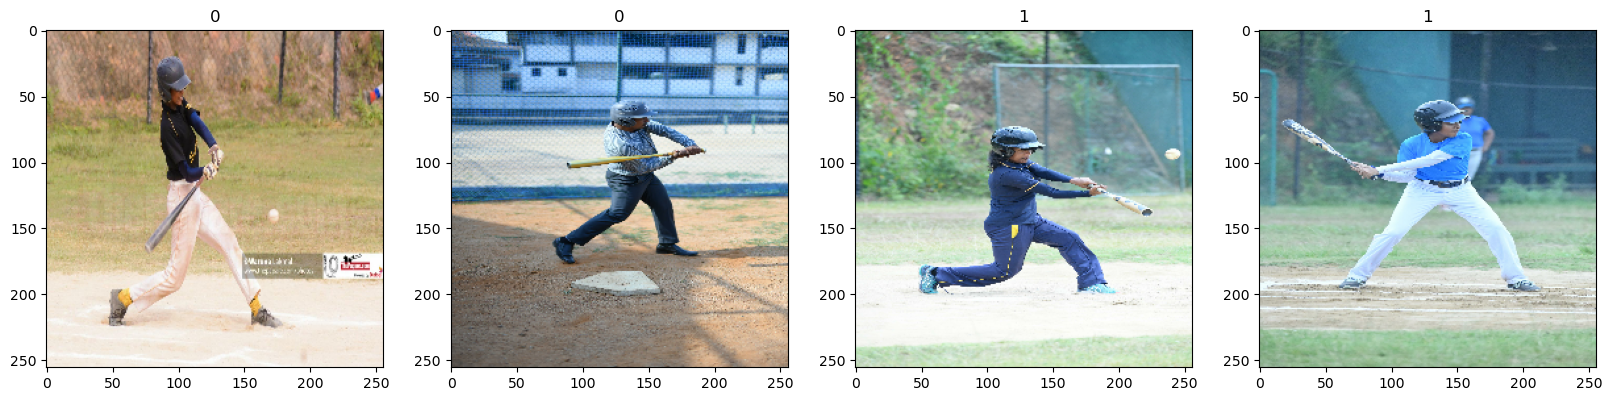

In [27]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## Split Data

In [28]:
len(Shot_Data)

3

In [29]:
train_size = int(len(Shot_Data)*.7)
val_size = int(len(Shot_Data)*.2)
test_size = int(len(Shot_Data)*.1)+1

In [30]:
train_size+val_size+test_size

3

In [31]:
train = Shot_Data.take(train_size)
val = Shot_Data.skip(train_size).take(val_size)
test = Shot_Data.skip(train_size + val_size). take(test_size)

In [32]:
len(train)

2

## Build Deep Learning Model

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [34]:
model = Sequential()

In [35]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [36]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

## Train

In [38]:
logdir='logs'

In [39]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [40]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
2/2 [==============================] - 8s 1s/step - loss: 1.5924 - accuracy: 0.5469
Epoch 2/20
2/2 [==============================] - 6s 1s/step - loss: 0.6967 - accuracy: 0.5781
Epoch 3/20
2/2 [==============================] - 6s 1s/step - loss: 0.6984 - accuracy: 0.3906
Epoch 4/20
2/2 [==============================] - 6s 1s/step - loss: 0.6895 - accuracy: 0.6094
Epoch 5/20
2/2 [==============================] - 6s 1s/step - loss: 0.6908 - accuracy: 0.5469
Epoch 6/20
2/2 [==============================] - 6s 1s/step - loss: 0.6783 - accuracy: 0.5781
Epoch 7/20
2/2 [==============================] - 6s 1s/step - loss: 0.6749 - accuracy: 0.5781
Epoch 8/20
2/2 [==============================] - 6s 1s/step - loss: 0.6822 - accuracy: 0.5469
Epoch 9/20
2/2 [==============================] - 6s 1s/step - loss: 0.6621 - accuracy: 0.5938
Epoch 10/20
2/2 [==============================] - 6s 1s/step - loss: 0.6289 - accuracy: 0.6250
Epoch 11/20
2/2 [==============================] 

## Plot Performane

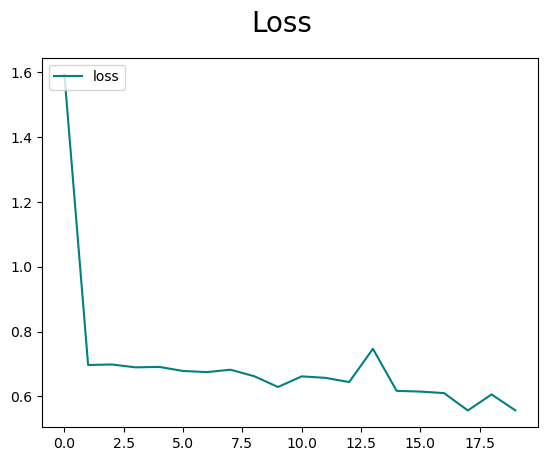

In [41]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
# plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

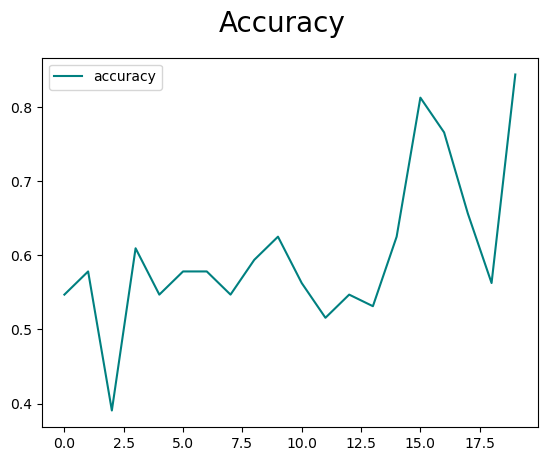

In [42]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
# plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [43]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [44]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [45]:
len(test)
## Result should be 1 - Not Sure

1

In [46]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 386ms/step


In [47]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')
## Results should be in between 0 - 1

Precision:0.7142857313156128, Recall:0.8333333134651184, Accuracy:0.7272727489471436


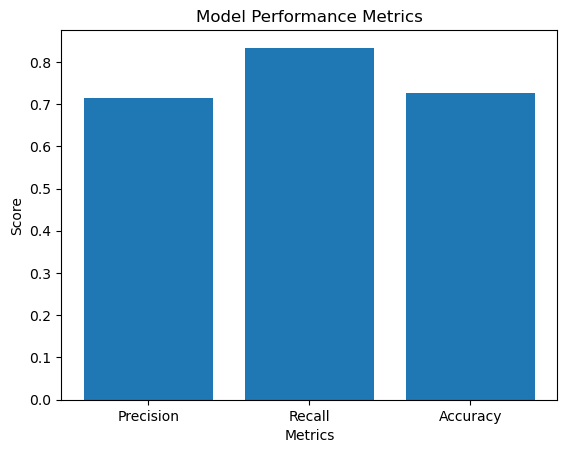

In [48]:
precision = pre.result().numpy()
recall = re.result().numpy()
accuracy = acc.result().numpy()

# Create a bar chart
fig, ax = plt.subplots()
ax.bar(['Precision', 'Recall', 'Accuracy'], [precision, recall, accuracy])

# Add labels to the chart
ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Model Performance Metrics')

# Display the chart
plt.show()

In [49]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.71428573, shape=(), dtype=float32) tf.Tensor(0.8333333, shape=(), dtype=float32) tf.Tensor(0.72727275, shape=(), dtype=float32)


## Test

In [50]:
import cv2

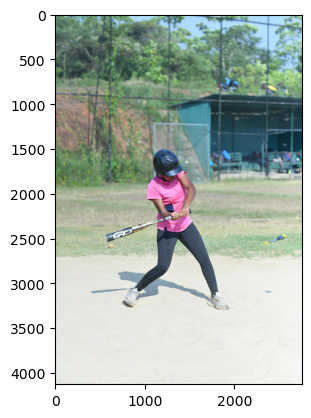

In [51]:
img = cv2.imread('shot.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

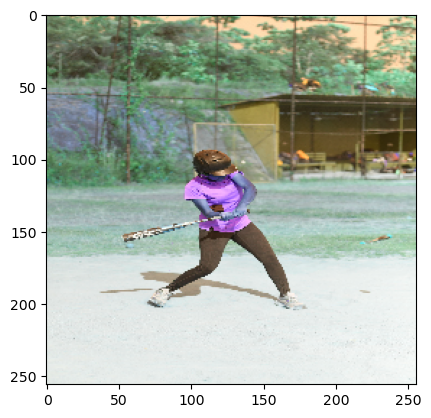

In [52]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [53]:
np.expand_dims(resize, 0)

array([[[[123.17969 , 145.49219 , 111.61719 ],
         [121.63281 , 143.75    , 109.171875],
         [120.8125  , 148.8125  , 112.8125  ],
         ...,
         [200.58594 , 237.71094 , 195.71094 ],
         [203.84375 , 233.63281 , 191.88281 ],
         [196.73438 , 222.42188 , 179.85938 ]],

        [[113.02344 , 128.02344 , 100.02344 ],
         [117.453125, 134.32812 , 104.453125],
         [ 96.796875, 120.109375,  87.484375],
         ...,
         [189.13281 , 235.13281 , 192.13281 ],
         [174.3125  , 222.4375  , 175.6875  ],
         [172.01562 , 209.25    , 162.66406 ]],

        [[112.      , 133.625   , 104.625   ],
         [123.27344 , 146.64844 , 113.89844 ],
         [117.25    , 140.875   , 109.4375  ],
         ...,
         [154.07812 , 188.45312 , 141.64062 ],
         [175.35938 , 210.53125 , 164.02344 ],
         [178.02344 , 207.14844 , 162.25    ]],

        ...,

        [[226.      , 233.      , 230.      ],
         [223.625   , 229.375   , 227.      ]

In [54]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 38ms/step


In [55]:
yhat
## 0 - Correct | 1 = Incorrect

array([[0.6312119]], dtype=float32)

In [56]:
if yhat > 0.5:
    print(f'Predicted Class is INCORRECT')
else:
    print(f'Predicted Class is CORRECT')

Predicted Class is INCORRECT


## Save the Model

In [57]:
import keras
from tensorflow.keras.models import load_model

In [58]:
model.save(os.path.join('shot_models','shotclassifier.keras.h5'))

In [59]:
new_model = load_model(os.path.join('shot_models', 'shotclassifier.keras.h5'))

In [60]:
new_model

In [61]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 120ms/step


array([[0.6312119]], dtype=float32)

In [62]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 38ms/step


In [63]:
if yhatnew > 0.5:
    print(f'Predicted Class is INCORRECT')
else:
    print(f'Predicted Class is CORRECT')

Predicted Class is INCORRECT
